# Covid 19 Python Exercise (use all your knowledge thus far to solve this)

From Wikipedia,

Coronavirus disease 2019 (COVID-19) is an infectious disease caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). The disease was first identified in 2019 in Wuhan, China, and has since spread globally, resulting in the 2019–20 coronavirus pandemic. Common symptoms include fever, cough and shortness of breath. Muscle pain, sputum production and sore throat are less common. The rate of deaths per number of diagnosed cases is on average 3.4%, ranging from 0.2% in those less than 20 to approximately 15% in those over 80 years old.

Data Source (Date wise) : 2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE

Data Source: https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports

File naming convention

MM-DD-YYYY.csv in UTC.

Field description

Province/State: China - province name; US/Canada/Australia/ - city name, state/province name; Others - name of the event (e.g., "Diamond Princess" cruise ship); other countries - blank.
Country/Region: country/region name conforming to WHO (will be updated).
Last Update: MM/DD/YYYY HH:mm (24 hour format, in UTC).
Confirmed: the number of confirmed cases. For Hubei Province: from Feb 13 (GMT +8), we report both clinically diagnosed and lab-confirmed cases. For lab-confirmed cases only (Before Feb 17), please refer to who_covid_19_situation_reports. For Italy, diagnosis standard might be changed since Feb 27 to "slow the growth of new case numbers." (Source)
Deaths: the number of deaths.
Recovered: the number of recovered cases.
Update frequency
Files after Feb 1 (UTC): once a day around 23:59 (UTC).
Files on and before Feb 1 (UTC): the last updated files before 23:59 (UTC).

In [1]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/10-10-2020.csv'
covid_cases = pd.read_csv(path)
pd.set_option('display.max_rows', covid_cases.shape[0])
covid_cases

FIPS                                     Admin2  \
0         NaN                                        NaN   
1         NaN                                        NaN   
2         NaN                                        NaN   
3         NaN                                        NaN   
4         NaN                                        NaN   
5         NaN                                        NaN   
6         NaN                                        NaN   
7         NaN                                        NaN   
8         NaN                                        NaN   
9         NaN                                        NaN   
10        NaN                                        NaN   
11        NaN                                        NaN   
12        NaN                                        NaN   
13        NaN                                        NaN   
14        NaN                                        NaN   
15        NaN                                        NaN   
16        NaN                                        NaN   
17        NaN                                        NaN   
18        NaN                                        NaN   
19        NaN                                        NaN   
20        NaN                                        NaN   
21        NaN                                        NaN   
22        NaN                                        NaN   
23        NaN                                        NaN   
24        NaN                                        NaN   
25        NaN                                        NaN   
26        NaN                                        NaN   
27        NaN                                        NaN   
28        NaN                                        NaN   
29        NaN                                        NaN   
30        NaN                                        NaN   
31        NaN                                        NaN   
32        NaN                                        NaN   
33        NaN                                        NaN   
34        NaN                                        NaN   
35        NaN                                        NaN   
36        NaN                                        NaN   
37        NaN                                        NaN   
38        NaN                                        NaN   
39        NaN                                        NaN   
40        NaN                                        NaN   
41        NaN                                        NaN   
42        NaN                                        NaN   
43        NaN                                        NaN   
44        NaN                                        NaN   
45        NaN                                        NaN   
46        NaN                                        NaN   
47        NaN                                        NaN   
48        NaN                                        NaN   
49        NaN                                        NaN   
50        NaN                                        NaN   
51        NaN                                        NaN   
52        NaN                                        NaN   
53        NaN                                        NaN   
54        NaN                                        NaN   
55        NaN                                        NaN   
56        NaN                                        NaN   
57        NaN                                        NaN   
58        NaN                                        NaN   
59        NaN                                        NaN   
60        NaN                                        NaN   
61        NaN                                        NaN   
62        NaN                                        NaN   
63        NaN                                        NaN   
64        NaN                                        NaN   
65        NaN                                    

Q1. Write Python code to display first 5 rows from COVID-19 dataset. Also print the dataset information and check the missing values.

In [3]:
covid_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3262 non-null   float64
 1   Admin2               3267 non-null   object 
 2   Province_State       3792 non-null   object 
 3   Country_Region       3960 non-null   object 
 4   Last_Update          3960 non-null   object 
 5   Lat                  3878 non-null   float64
 6   Long_                3878 non-null   float64
 7   Confirmed            3960 non-null   int64  
 8   Deaths               3960 non-null   int64  
 9   Recovered            3960 non-null   int64  
 10  Active               3956 non-null   float64
 11  Combined_Key         3960 non-null   object 
 12  Incidence_Rate       3873 non-null   float64
 13  Case-Fatality_Ratio  3908 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 433.2+ KB


In [4]:
covid_cases.isnull().sum()

FIPS                   698
Admin2                 693
Province_State         168
Country_Region           0
Last_Update              0
Lat                     82
Long_                   82
Confirmed                0
Deaths                   0
Recovered                0
Active                   4
Combined_Key             0
Incidence_Rate          87
Case-Fatality_Ratio     52
dtype: int64

In [5]:
covid_cases.head()

FIPS Admin2 Province_State Country_Region          Last_Update       Lat  \
0   NaN    NaN            NaN    Afghanistan  2020-10-11 04:23:46  33.93911   
1   NaN    NaN            NaN        Albania  2020-10-11 04:23:46  41.15330   
2   NaN    NaN            NaN        Algeria  2020-10-11 04:23:46  28.03390   
3   NaN    NaN            NaN        Andorra  2020-10-11 04:23:46  42.50630   
4   NaN    NaN            NaN         Angola  2020-10-11 04:23:46 -11.20270   

       Long_  Confirmed  Deaths  Recovered   Active Combined_Key  \
0  67.709953      39703    1475      33064   5166.0  Afghanistan   
1  20.168300      15231     416       9406   5409.0      Albania   
2   1.659600      52940    1795      37170  13975.0      Algeria   
3   1.521800       2696      55       1814    827.0      Andorra   
4  17.873900       6246     218       2716   3312.0       Angola   

   Incidence_Rate  Case-Fatality_Ratio  
0      101.989962             3.710047  
1      529.258461             2.731272  
2      120.726889             3.390631  
3     3489.290105             2.040059  
4       19.004287             3.490234

Q2. Write a Python program to get the latest number of confirmed, deaths, recovered and active cases of Novel Coronavirus (COVID-19) Country wise

In [6]:
covid_cases.groupby(['Country_Region'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum()

<ipython-input-6-5e47e07e6d00>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  covid_cases.groupby(['Country_Region'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum()


Confirmed  Deaths  Recovered     Active
Country_Region                                                           
Afghanistan                           39703    1475      33064     5166.0
Albania                               15231     416       9406     5409.0
Algeria                               52940    1795      37170    13975.0
Andorra                                2696      55       1814      827.0
Angola                                 6246     218       2716     3312.0
Antigua and Barbuda                     111       3         97       11.0
Argentina                            883882   23581     709464   150837.0
Armenia                               55736    1016      45771     8949.0
Australia                             27263     898      21855     1378.0
Austria                               54423     852      42829    10742.0
Azerbaijan                            41752     608      39235     1909.0
Bahamas                                5023     106       2815     2102.0
Bahrain                               75287     273      70808     4206.0
Bangladesh                           377073    5500     291365    80208.0
Barbados                                206       7        183       16.0
Belarus                               82471     885      76543     5043.0
Belgium                              156931   10175      20202   126554.0
Belize                                 2427      35       1487      905.0
Benin                                  2411      41       1973      397.0
Bhutan                                  306       0        287       19.0
Bolivia                              138463    8292     100786    29385.0
Bosnia and Herzegovina                30345     927      23370     6048.0
Botswana                               3219      18        834     2367.0
Brazil                              5082637  150198    4502854   429585.0
Brunei                                  146       3        143        0.0
Bulgaria                              24319     891      15818     7610.0
Burkina Faso                           2271      61       1542      668.0
Burma                                 26064     598       7050    18416.0
Burundi                                 517       1        472       44.0
Cabo Verde                             6913      74       5970      869.0
Cambodia                                283       0        277        6.0
Cameroon                              21203     423      20117      663.0
Canada                               182767    9694     153857    19250.0
Central African Republic               4854      62       1924     2868.0
Chad                                   1291      92       1103       96.0
Chile                                479595   13272     452054    14269.0
China                                 90778    4739      85658      381.0
Colombia                             902747   27660     783131    91956.0
Comoros                                 495       7        475       13.0
Congo (Brazzaville)                    5118      90       3887     1141.0
Congo (Kinshasa)                      10841     276      10242      323.0
Costa Rica                            87439    1076      52669    33694.0
Cote d'Ivoire                         20128     120      19752      256.0
Croatia                               19932     317      16953     2662.0
Cuba                                   5948     123       5440      385.0
Cyprus                                 1986      25       1444      517.0
Czechia                              114005     948      54909    58148.0
Denmark                               32575     667      26462     5446.0
Diamond Princess                        712      13        659       40.0
Djibouti                               5423      61       5355        7.0
Dominica                                 32       0         24        8.0
Dominican Republic                   118014    2167      93627    22220.0
Ecuador                              1

Q3. Write a Python program to get the Chinese province wise cases of confirmed, deaths and recovered cases of Novel Coronavirus (COVID-19)

In [7]:
x = covid_cases[covid_cases['Country_Region'] == 'China']
x.groupby(['Province_State'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum()


<ipython-input-7-35cc9fc2c476>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  x.groupby(['Province_State'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum()


Confirmed  Deaths  Recovered  Active
Province_State                                      
Anhui                 991       6        985     0.0
Beijing               936       9        927     0.0
Chongqing             585       6        578     1.0
Fujian                415       1        400    14.0
Gansu                 170       2        168     0.0
Guangdong            1858       8       1823    27.0
Guangxi               260       2        256     2.0
Guizhou               147       2        145     0.0
Hainan                171       6        165     0.0
Hebei                 365       6        358     1.0
Heilongjiang          948      13        935     0.0
Henan                1281      22       1255     4.0
Hong Kong            5175     105       4914   156.0
Hubei               68139    4512      63627     0.0
Hunan                1019       4       1015     0.0
Inner Mongolia        268       1        261     6.0
Jiangsu               667       0        664     3.0
Jiangxi               935       1        934     0.0
Jilin                 157       2        155     0.0
Liaoning              276       2        269     5.0
Macau                  46       0         46     0.0
Ningxia                75       0         75     0.0
Qinghai                18       0         18     0.0
Shaanxi               428       3        397    28.0
Shandong              832       7        824     1.0
Shanghai             1048       7        980    61.0
Shanxi                206       0        203     3.0
Sichuan               721       3        673    45.0
Tianjin               244       3        236     5.0
Tibet                   1       0          1     0.0
Xinjiang              902       3        899     0.0
Yunnan                211       2        200     9.0
Zhejiang             1283       1       1272    10.0

Q4. Write a Python program to get the latest country wise deaths cases of Novel Coronavirus (COVID-19)

In [8]:
x = covid_cases.groupby(['Country_Region'])['Deaths'].sum().reset_index()
x[covid_cases['Deaths']>0]

<ipython-input-8-eebae2720b52>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x[covid_cases['Deaths']>0]


Country_Region  Deaths
0                         Afghanistan    1475
1                             Albania     416
2                             Algeria    1795
3                             Andorra      55
4                              Angola     218
5                 Antigua and Barbuda       3
6                           Argentina   23581
7                             Armenia    1016
8                           Australia     898
9                             Austria     852
11                            Bahamas     106
12                            Bahrain     273
13                         Bangladesh    5500
14                           Barbados       7
15                            Belarus     885
16                            Belgium   10175
17                             Belize      35
18                              Benin      41
19                             Bhutan       0
20                            Bolivia    8292
21             Bosnia and Herzegovina     927
22                           Botswana      18
23                             Brazil  150198
24                             Brunei       3
25                           Bulgaria     891
27                              Burma     598
28                            Burundi       1
29                         Cabo Verde      74
30                           Cambodia       0
31                           Cameroon     423
32                             Canada    9694
33           Central African Republic      62
34                               Chad      92
35                              Chile   13272
36                              China    4739
37                           Colombia   27660
38                            Comoros       7
39                Congo (Brazzaville)      90
40                   Congo (Kinshasa)     276
41                         Costa Rica    1076
42                      Cote d'Ivoire     120
43                            Croatia     317
44                               Cuba     123
45                             Cyprus      25
46                            Czechia     948
47                            Denmark     667
48                   Diamond Princess      13
49                           Djibouti      61
50                           Dominica       0
51                 Dominican Republic    2167
52                            Ecuador   12188
53                              Egypt    6040
54                        El Salvador     887
55                  Equatorial Guinea      83
56                            Eritrea       0
57                            Estonia      68
58                           Eswatini     113
59                           Ethiopia    1277
60                               Fiji       2
61                            Finland     346
62                             France   32684
64                             Gambia     117
65                            Georgia      78
66                            Germany    9620
67                              Ghana     306
69                            Grenada       0
70                          Guatemala    3365
71                             Guinea      69
73                             Guyana     102
75                           Holy See       0
77                            Hungary     933
78                            Iceland      10
80                          Indonesia   11765
81                               Iran   28293
82                               Iraq    9790
83                            Ireland    1824
84                             Israel    1968
85                              Italy   36140
86                            Jamaica     138
87                              Japan    1626
88                             Jordan     181
89                         Kazakhstan    2111
90                              Kenya     760
91                       Korea, South     432
92                             Kosovo     645
93                             Kuwait     655
94                   

Q5. Write a Python program to list countries with no cases of Novel Coronavirus (COVID-19) recovered

In [9]:
x2 = covid_cases.groupby(['Country_Region' ]).sum()
x2[x2['Recovered'] == 0]
#x1.groupby(['Country_Region' ]).sum()

FIPS        Lat     Long_  Confirmed  Deaths  Recovered  \
Country_Region                                                            
MS Zaandam       0.0     0.0000    0.0000          9       2          0   
Samoa            0.0   -13.7590 -172.1046          0       0          0   
Serbia           0.0    44.0165   21.0059      34685     762          0   
Sweden           0.0  1253.2935  330.4669      98451    5894          0   

                 Active  Incidence_Rate  Case-Fatality_Ratio  
Country_Region                                                
MS Zaandam          7.0        0.000000            22.222222  
Samoa               0.0        0.000000             0.000000  
Serbia          33923.0      396.973002             2.196915  
Sweden          92557.0    18415.065419           109.112874

In [10]:
y = covid_cases.groupby(['Country_Region'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum()
y[y['Recovered'] == 0]


<ipython-input-10-8561d71ac033>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  y = covid_cases.groupby(['Country_Region'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum()


Confirmed  Deaths  Recovered   Active
Country_Region                                       
MS Zaandam              9       2          0      7.0
Samoa                   0       0          0      0.0
Serbia              34685     762          0  33923.0
Sweden              98451    5894          0  92557.0

Q6. Write a Python program to get the latest number of confirmed deaths and recovered people of Novel Coronavirus (COVID-19) cases Country/Region - Province/State wise.


In [11]:
covid_cases.groupby(['Country_Region','Province_State'])['Confirmed','Deaths','Recovered'].sum()

<ipython-input-11-c1b518a790ec>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  covid_cases.groupby(['Country_Region','Province_State'])['Confirmed','Deaths','Recovered'].sum()


Confirmed  \
Country_Region Province_State                                            
Australia      Australian Capital Territory                        113   
               New South Wales                                    4278   
               Northern Territory                                   33   
               Queensland                                         1161   
               South Australia                                     473   
               Tasmania                                            230   
               Victoria                                          20281   
               Western Australia                                   694   
Brazil         Acre                                              29031   
               Alagoas                                           88790   
               Amapa                                             49303   
               Amazonas                                         147038   
               Bahia                                            324964   
               Ceara                                            259764   
               Distrito Federal                                 199569   
               Espirito Santo                                   138442   
               Goias                                            228538   
               Maranhao                                         178549   
               Mato Grosso                                      131175   
               Mato Grosso do Sul                                74567   
               Minas Gerais                                     321140   
               Para                                             237925   
               Paraiba                                          125713   
               Parana                                           191135   
               Pernambuco                                       152998   
               Piaui                                            101951   
               Rio Grande do Norte                               72625   
               Rio Grande do Sul                                213782   
               Rio de Janeiro                                   283407   
               Rondonia                                          67812   
               Roraima                                           52440   
               Santa Catarina                                   226614   
               Sao Paulo                                       1034816   
               Sergipe                                           79501   
               Tocantins                                         71048   
Canada         Alberta                                           19995   
               British Columbia                                  10185   
               Diamond Princess                                      0   
               Grand Princess                                       13   
               Manitoba                                           2524   
               New Brunswick                                       258   
               Newfoundland and Labrador                           282   
               Northwest Territories                                 5   
               Nova Scotia                                        1092   
               Nunavut                                               0   
               Ontario                                           61078   
               Prince Edward Island                                 61   
               Quebec                                            85191   
               Saskatchewan                                       2068   
               Yukon                                                15   
Chile          Antofagasta                                       20479   
               Araucania                                          8939   
               Arica y Parinacota                                

Q7. Write a Python program to list countries with all cases of Novel Coronavirus (COVID-19) died

In [12]:
x = covid_cases.groupby(['Country_Region'])['Confirmed','Deaths','Recovered'].sum()
x = x[x['Deaths'] == x['Confirmed']]
x = x[x['Confirmed'] > 0]
print(x)
print('\n None')

Empty DataFrame
Columns: [Confirmed, Deaths, Recovered]
Index: []

 None


<ipython-input-12-afeadcb872a3>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  x = covid_cases.groupby(['Country_Region'])['Confirmed','Deaths','Recovered'].sum()


Q8.Write a Python program to list countries with all cases of Novel Coronavirus (COVID-19) recovered.

In [13]:
x = covid_cases.groupby(['Country_Region', 'Province_State'])['Confirmed','Recovered'].sum()
x = x[x['Recovered'] == x['Confirmed']]
x = x[x['Confirmed'] > 0]
x

<ipython-input-13-5e6c14328a5b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  x = covid_cases.groupby(['Country_Region', 'Province_State'])['Confirmed','Recovered'].sum()


Confirmed  \
Country_Region Province_State                                            
Australia      Northern Territory                                   33   
Canada         Grand Princess                                       13   
               Northwest Territories                                 5   
               Yukon                                                15   
China          Macau                                                46   
               Ningxia                                              75   
               Qinghai                                              18   
               Tibet                                                 1   
France         New Caledonia                                        27   
Japan          Shimane                                             140   
               Unknown                                               8   
United Kingdom Anguilla                                              3   
               Falkland Islands (Malvinas)                          13   
               Saint Helena, Ascension and Tristan da Cunha          2   

                                                             Recovered  
Country_Region Province_State                                           
Australia      Northern Territory                                   33  
Canada         Grand Princess                                       13  
               Northwest Territories                                 5  
               Yukon                                                15  
China          Macau                                                46  
               Ningxia                                              75  
               Qinghai                                              18  
               Tibet                                                 1  
France         New Caledonia                                        27  
Japan          Shimane                                             140  
               Unknown                                               8  
United Kingdom Anguilla                                              3  
               Falkland Islands (Malvinas)                          13  
               Saint Helena, Ascension and Tristan da Cunha          2

In [14]:
x = covid_cases[covid_cases['Confirmed'] == covid_cases['Recovered']]
x = x[x['Recovered'] > 0 ]
x = x[['Country_Region', 'Province_State', 'Confirmed', 'Deaths', 'Recovered']]
x

Country_Region  \
10                           Australia   
68                              Canada   
72                              Canada   
79                              Canada   
119                              China   
120                              China   
121                              China   
128                              China   
197                             France   
225                            Grenada   
231                           Holy See   
336                              Japan   
343                              Japan   
564   Saint Vincent and the Grenadines   
629                        Timor-Leste   
3934                    United Kingdom   
3940                    United Kingdom   
3945                    United Kingdom   

                                    Province_State  Confirmed  Deaths  \
10                              Northern Territory         33       0   
68                                  Grand Princess         13       0   
72                           Northwest Territories          5       0   
79                                           Yukon         15       0   
119                                          Macau         46       0   
120                                        Ningxia         75       0   
121                                        Qinghai         18       0   
128                                          Tibet          1       0   
197                                  New Caledonia         27       0   
225                                            NaN         24       0   
231                                            NaN         12       0   
336                                        Shimane        140       0   
343                                        Unknown          8       0   
564                                            NaN         64       0   
629                                            NaN         28       0   
3934                                      Anguilla          3       0   
3940                   Falkland Islands (Malvinas)         13       0   
3945  Saint Helena, Ascension and Tristan da Cunha          2       0   

      Recovered  
10           33  
68           13  
72            5  
79           15  
119          46  
120          75  
121          18  
128           1  
197          27  
225          24  
231          12  
336         140  
343           8  
564          64  
629          28  
3934          3  
3940         13  
3945          2

Q9. Write a Python program to get the top 10 countries data (Last Update, Country/Region, Confirmed, Deaths, Recovered) of Novel Coronavirus (COVID-19).

In [15]:
covid_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3262 non-null   float64
 1   Admin2               3267 non-null   object 
 2   Province_State       3792 non-null   object 
 3   Country_Region       3960 non-null   object 
 4   Last_Update          3960 non-null   object 
 5   Lat                  3878 non-null   float64
 6   Long_                3878 non-null   float64
 7   Confirmed            3960 non-null   int64  
 8   Deaths               3960 non-null   int64  
 9   Recovered            3960 non-null   int64  
 10  Active               3956 non-null   float64
 11  Combined_Key         3960 non-null   object 
 12  Incidence_Rate       3873 non-null   float64
 13  Case-Fatality_Ratio  3908 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 433.2+ KB


In [16]:
top_cases = covid_cases.groupby(['Country_Region', 'Last_Update'])['Confirmed', 'Deaths', 'Recovered'].sum().sort_values(by='Confirmed', ascending = False).head(10)
top_cases

<ipython-input-16-2341e60b6ee8>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top_cases = covid_cases.groupby(['Country_Region', 'Last_Update'])['Confirmed', 'Deaths', 'Recovered'].sum().sort_values(by='Confirmed', ascending = False).head(10)


Confirmed  Deaths  Recovered
Country_Region Last_Update                                      
US             2020-10-11 04:23:46    7748734  214509    3062983
India          2020-10-11 04:23:46    7053806  108334    6077976
Brazil         2020-10-11 04:23:46    5082637  150198    4502854
Russia         2020-10-11 04:23:46    1278245   22331    1011911
Colombia       2020-10-11 04:23:46     902747   27660     783131
Argentina      2020-10-11 04:23:46     883882   23581     709464
Spain          2020-10-11 04:23:46     861112   32929     150376
Peru           2020-10-11 04:23:46     846088   33223     733000
Mexico         2020-10-11 04:23:46     814328   83642     689377
France         2020-10-11 04:23:46     761441   32684     103232

Q10. Write a Python program to create a plot (bar) of total deaths, confirmed, recovered and active cases Country wise where deaths greater than 150.

<ipython-input-17-1053be06d230>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  r_data = covid_cases.groupby(['Country_Region'])['Deaths', 'Confirmed', 'Recovered', 'Active'].sum()


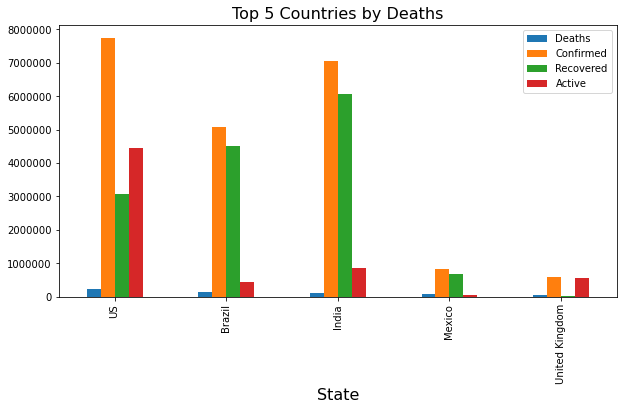

In [17]:
r_data = covid_cases.groupby(['Country_Region'])['Deaths', 'Confirmed', 'Recovered', 'Active'].sum()
r_data = r_data.sort_values('Deaths', ascending=False).head(15).reset_index().head(5)

r_data.plot(x = "Country_Region", y = ['Deaths', 'Confirmed', 'Recovered', 'Active'], kind='bar', figsize= (10,5))
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title('Deaths of Covid by State in USA', fontsize=16)
plt.xlabel('State', fontsize = 16)
plt.title('Top 5 Countries by Deaths', fontsize = 16)
plt.show()

<ipython-input-19-243b3f73cc96>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  r_data = covid_cases.groupby(['Country_Region'])['Deaths', 'Confirmed', 'Recovered', 'Active'].sum()


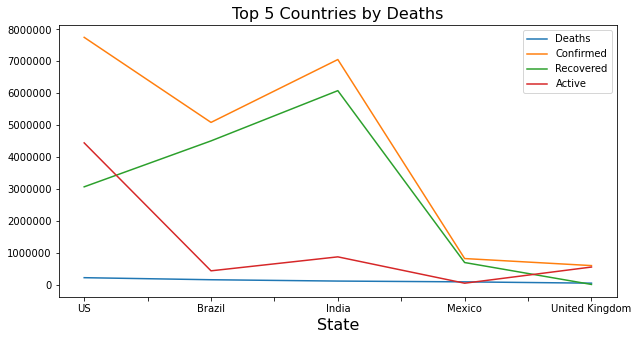

In [19]:
r_data = covid_cases.groupby(['Country_Region'])['Deaths', 'Confirmed', 'Recovered', 'Active'].sum()
r_data = r_data.sort_values('Deaths', ascending=False).head(15).reset_index().head(5)

r_data.plot(x = "Country_Region", y = ['Deaths', 'Confirmed', 'Recovered', 'Active'], kind='line', figsize= (10,5))
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title('Deaths of Covid by State in USA', fontsize=16)
plt.xlabel('State', fontsize = 16)
plt.title('Top 5 Countries by Deaths', fontsize = 16)
plt.show()

Q.11  Write a Python program to visualize the state/province wise death cases of Novel Coronavirus (COVID-19) in USA

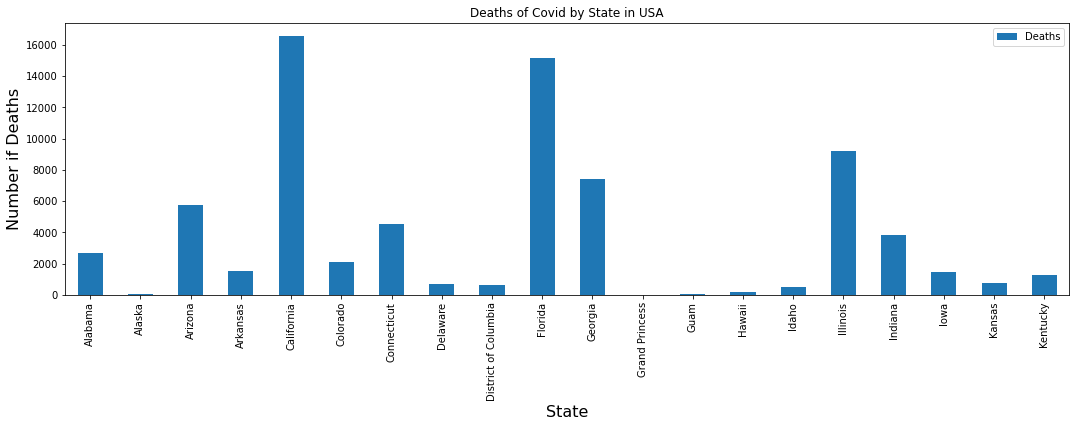

Country_Region            Province_State  Deaths
476             US                   Alabama    2664
477             US                    Alaska      61
478             US                   Arizona    5759
479             US                  Arkansas    1552
480             US                California   16567
481             US                  Colorado    2112
482             US               Connecticut    4530
483             US                  Delaware     671
485             US      District of Columbia     636
486             US                   Florida   15186
487             US                   Georgia    7393
488             US            Grand Princess       3
489             US                      Guam      58
490             US                    Hawaii     168
491             US                     Idaho     507
492             US                  Illinois    9221
493             US                   Indiana    3831
494             US                      Iowa    1459
495             US                    Kansas     773
496             US                  Kentucky    1249
497             US                 Louisiana    5635
498             US                     Maine     143
499             US                  Maryland    3995
500             US             Massachusetts    9587
501             US                  Michigan    7219
502             US                 Minnesota    2184
503             US               Mississippi    3096
504             US                  Missouri    2436
505             US                   Montana     209
506             US                  Nebraska     519
507             US                    Nevada    1659
508             US             New Hampshire     455
509             US                New Jersey   16171
510             US                New Mexico     907
511             US                  New York   33466
512             US            North Carolina    3765
513             US              North Dakota     336
514             US  Northern Mariana Islands       2
515             US                      Ohio    4623
516             US                  Oklahoma    1095
517             US                    Oregon     599
518             US              Pennsylvania    8324
519             US               Puerto Rico     728
521             US              Rhode Island    1148
522             US            South Carolina    3551
523             US              South Dakota     286
524             US                 Tennessee    2758
525             US                     Texas   17208
526             US                      Utah     510
527             US                   Vermont      58
528             US            Virgin Islands      20
529             US                  Virginia    3354
530             US                Washington    2168
531             US             West Virginia     387
532             US                 Wisconsin    1458
533             US                   Wyoming      54

In [23]:
new_cases = covid_cases.groupby(['Country_Region', 'Province_State'])['Deaths'].sum().reset_index()
total = new_cases[(new_cases['Country_Region'] == 'US') & (new_cases['Deaths'] > 0)]

z = total.head(20).plot(x = 'Province_State', y = ['Deaths'], kind = 'bar', figsize=(18, 5))
plt.ticklabel_format(useOffset = False, style = 'plain', axis = 'y')

plt.title('Deaths of Covid by State in USA')
plt.xlabel('State', fontsize = 16)
plt.ylabel('Number if Deaths', fontsize = 16)

plt.show()
total

Q.12 Write a Python program to visualize the state/province wise Active cases of Novel Coronavirus (COVID-19) in USA

Text(0, 0.5, 'Covid(Case)')

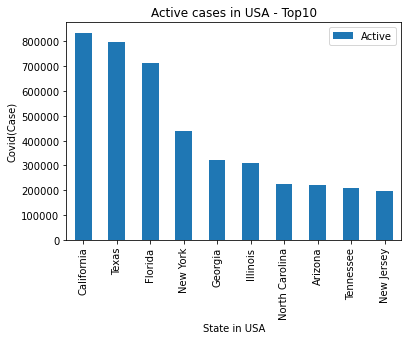

In [24]:
result = covid_cases[covid_cases['Country_Region'] == 'US']
result = covid_cases.groupby(result[result['Active'] > 1]['Province_State'])['Active'].sum().reset_index()
result = result.sort_values(by = 'Active', ascending = False).reset_index(drop = 'False').head(10)
disc = {}
for title in result:
    disc[title] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    for a, i in enumerate(result[title]):
        disc[title][a] = i
disc
plotdata = pd.DataFrame({
    'Active': disc['Active'],
    },
    index = disc['Province_State']
)
plotdata.plot(kind = 'bar')
plt.ticklabel_format(useOffset = False, style = 'Plain', axis = 'y')
plt.title('Active cases in USA - Top10')
plt.xlabel('State in USA')
plt.ylabel('Covid(Case)')


Q.13 Write a Python program to visualize the state/province wise combine number of confirmed, deaths, recovered, active Novel Coronavirus (COVID-19) cases in USA.

<ipython-input-25-7b8e1ba1275c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  a = covid_cases.groupby(['Country_Region','Province_State'])['Deaths', 'Confirmed', 'Recovered', 'Active'].sum().reset_index()


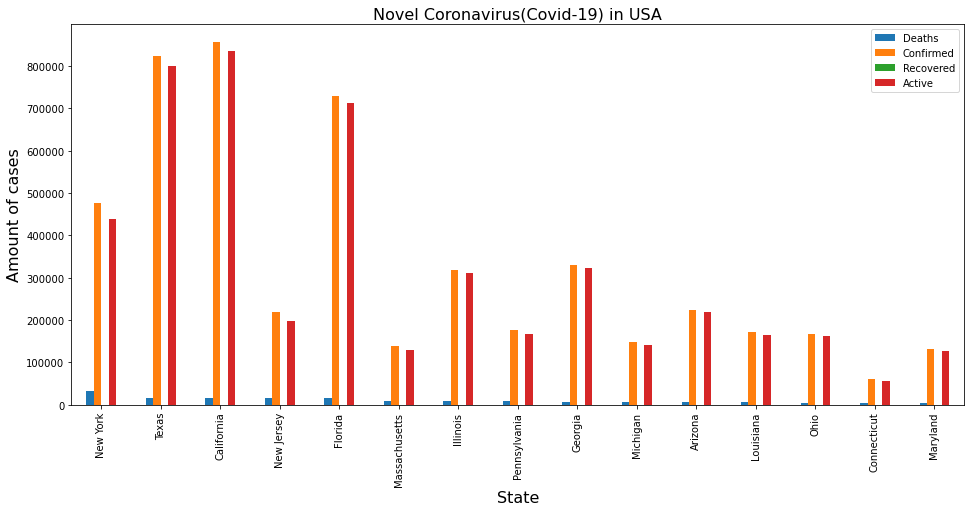

Country_Region Province_State  Deaths  Confirmed  Recovered    Active
511             US       New York   33466     476397          0  439850.0
525             US          Texas   17208     824119          0  798972.0
480             US     California   16567     855740          0  835843.0
509             US     New Jersey   16171     219274          0  196706.0
486             US        Florida   15186     728921          0  713735.0
500             US  Massachusetts    9587     138340          0  128753.0
492             US       Illinois    9221     319451          0  310230.0
518             US   Pennsylvania    8324     175797          0  167473.0
487             US        Georgia    7393     330269          0  322876.0
501             US       Michigan    7219     149453          0  142234.0
478             US        Arizona    5759     224978          0  219220.0
497             US      Louisiana    5635     170878          0  165243.0
515             US           Ohio    4623     167458          0  162461.0
482             US    Connecticut    4530      60038          0   55508.0
499             US       Maryland    3995     130795          0  126800.0

In [25]:
a = covid_cases.groupby(['Country_Region','Province_State'])['Deaths', 'Confirmed', 'Recovered', 'Active'].sum().reset_index()
b = a[(a['Country_Region'] == 'US') & (a['Active'] > 0)]
b = b.sort_values('Deaths', ascending = False).head(15)
b

b.plot(x = "Province_State", y = ['Deaths', 'Confirmed', 'Recovered', 'Active'], kind = 'bar', figsize=(16, 7))
plt.ticklabel_format(useOffset = False, style = 'plain', axis = 'y')
plt.title('Novel Coronavirus(Covid-19) in USA', fontsize = 16)
plt.xlabel('State', fontsize = 16)
plt.ylabel('Amount of cases', fontsize = 16)
plt.show()

b

IGNORE Q.14 Write a Python program to visualize Worldwide Confirmed Novel Coronavirus (COVID-19) cases over time